In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv(r'D:\Sai\python\titanic\train.csv')
test  = pd.read_csv(r'D:\Sai\python\titanic\test.csv')

In [3]:
train['file_type'] = 'train'

In [4]:
test['file_type'] = 'test'

In [5]:
total = [train,test]
master = pd.concat(total)
check = master.copy()

In [6]:
pd.DataFrame([train.isnull().sum()/len(train)*100])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,file_type
0,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467,0.0


In [7]:
pd.DataFrame([test.isnull().sum()/len(test)*100])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,file_type
0,0.0,0.0,0.0,0.0,20.574163,0.0,0.0,0.0,0.239234,78.229665,0.0,0.0


In [8]:
# print('No of survivers','\n',train['Survived'].value_counts())
# print('Passenger gender','\n',train['Sex'].value_counts())
# print('Passenger class','\n',train['Pclass'].value_counts())

            0    1
Survived  549  342
     male  female
Sex   577     314
          3    1    2
Pclass  491  216  184
            S    C   Q
Embarked  644  168  77


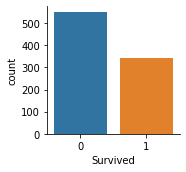

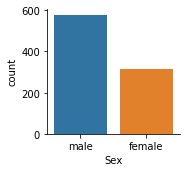

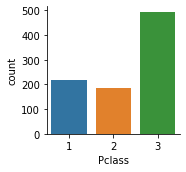

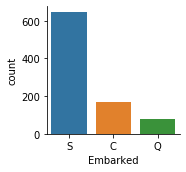

In [9]:
print(pd.DataFrame([train['Survived'].value_counts()]))
sns.catplot(x="Survived", kind="count", data=train,height=2.5)
print(pd.DataFrame([train['Sex'].value_counts()]))
sns.catplot(x="Sex", kind="count", data=train,height=2.5)
print(pd.DataFrame([train['Pclass'].value_counts()]))
sns.catplot(x="Pclass", kind="count", data=train,height=2.5)
print(pd.DataFrame([train['Embarked'].value_counts()]))
sns.catplot(x="Embarked", kind="count", data=train,height=2.5)

In [10]:
master.drop(['Cabin'],axis =1,inplace=True)
master['Title'] = master.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [11]:
master.drop(['Name'], axis= True, inplace=True)

In [12]:
train[['Survived','Pclass']].groupby(['Pclass'],as_index=False).sum().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,136
2,3,119
1,2,87


In [13]:
train[['Survived','Sex']].groupby(['Sex'],as_index=False).sum().sort_values(by='Sex',ascending=True)

,Sex,Survived
0,female,233
1,male,109


In [14]:
master.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [15]:
# # master['Age_bin']= pd.cut(train['Age'],8)
# # master[['Survived','Age_bin']].groupby(['Age_bin'],as_index=False).sum().sort_values(by='Survived', ascending=True)
# master.loc[(master['Age']>70),'Age_weight']=1
# master.loc[(master['Age']>60) & (master['Age']<=70), 'Age_weight']=2
# master.loc[(master['Age']>50) & (master['Age']<=60), 'Age_weight']=3
# master.loc[(master['Age']>40) & (master['Age']<=50), 'Age_weight']=4
# master.loc[(master['Age']>30) & (master['Age']<=40), 'Age_weight']=7
# master.loc[(master['Age']>=0) & (master['Age']<=10), 'Age_weight']=5
# master.loc[(master['Age']>20) & (master['Age']<=30), 'Age_weight']=8
# master.loc[(master['Age']>10) & (master['Age']<=20), 'Age_weight']=6


# master['Fare_bin']= pd.cut(train['Fare'],10)
# master[['Survived','Fare_bin']].groupby(['Fare_bin'],as_index=False).sum().sort_values(by='Survived', ascending=True)
# master.loc[(master['Fare']>307) & (master['Fare']<=461), 'Fare']=0
# master.loc[(master['Fare']>153.699) & (master['Fare']<=204.932), 'Fare']=1
# master.loc[(master['Fare']>461.096) & (master['Fare']>=512), 'Fare']=3
# master.loc[(master['Fare']>256.165) & (master['Fare']<=307.398), 'Fare']=4
# master.loc[(master['Fare']>204.932) & (master['Fare']<=256.165), 'Fare']=5
# master.loc[(master['Fare']>102.466) & (master['Fare']<=153.699), 'Fare']=6
# master.loc[(master['Fare']>51.233) & (master['Fare']<=102.466), 'Fare']=7
# master.loc[(master['Fare']<=0) & (master['Fare']<=51.233), 'Fare']=8

In [16]:
Number_of_persons_per_ticket = master[['Ticket','Sex']].groupby(['Ticket'],as_index=False).count().sort_values(by='Sex', ascending=False)

In [17]:
Number_of_persons_per_ticket

,Ticket,Sex
778,CA. 2343,11
104,1601,8
775,CA 2144,8
335,3101295,7
454,347077,7
...,...,...
407,342826,1
408,343095,1
409,343120,1
410,343271,1


In [18]:
dictionary = dict(zip(Number_of_persons_per_ticket.Ticket,Number_of_persons_per_ticket.Sex))

val_list=[]

for i in master['Ticket']:
    val=dictionary.get(i)
    val_list.append(val)
master['Persons_per_ticket']=val_list

In [19]:
master.drop(['Ticket'], axis=1, inplace=True)

In [20]:
master

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,file_type,Title,Persons_per_ticket
0,1,0.0,3,male,22.0,1,0,7.2500,S,train,Mr,1
1,2,1.0,1,female,38.0,1,0,71.2833,C,train,Mrs,2
2,3,1.0,3,female,26.0,0,0,7.9250,S,train,Miss,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,train,Mrs,2
4,5,0.0,3,male,35.0,0,0,8.0500,S,train,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,NaN,0,0,8.0500,S,test,Mr,1
414,1306,NaN,1,female,39.0,0,0,108.9000,C,test,Dona,3
415,1307,NaN,3,male,38.5,0,0,7.2500,S,test,Mr,1
416,1308,NaN,3,male,NaN,0,0,8.0500,S,test,Mr,1


In [21]:
master.loc[(master['Age']<=1),'Age_weight']='Infants'
master.loc[(master['Age']>1) & (master['Age']<=11), 'Age_weight']='Kids'
master.loc[(master['Age']>11) & (master['Age']<=18), 'Age_weight']='Teens'
master.loc[(master['Age']>18) & (master['Age']<=30), 'Age_weight']='Youth'
master.loc[(master['Age']>30) & (master['Age']<=60), 'Age_weight']='Adults'
master.loc[(master['Age']>60), 'Age_weight']='Old People'


In [22]:
master.drop(['Age'], axis=1, inplace=True)

In [23]:
master

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,file_type,Title,Persons_per_ticket,Age_weight
0,1,0.0,3,male,1,0,7.2500,S,train,Mr,1,Youth
1,2,1.0,1,female,1,0,71.2833,C,train,Mrs,2,Adults
2,3,1.0,3,female,0,0,7.9250,S,train,Miss,1,Youth
3,4,1.0,1,female,1,0,53.1000,S,train,Mrs,2,Adults
4,5,0.0,3,male,0,0,8.0500,S,train,Mr,1,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,0,0,8.0500,S,test,Mr,1,NaN
414,1306,NaN,1,female,0,0,108.9000,C,test,Dona,3,Adults
415,1307,NaN,3,male,0,0,7.2500,S,test,Mr,1,Adults
416,1308,NaN,3,male,0,0,8.0500,S,test,Mr,1,NaN


In [24]:
# from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore')
#enc_df = pd.DataFrame(enc.fit_transform(master[['Pclass']]).toarray())
# master = master.join(enc_df)
# master

In [25]:
master = pd.get_dummies(master, columns=["Pclass"])

In [26]:
master = pd.get_dummies(master, columns=["Sex"])

In [27]:
master = pd.get_dummies(master, columns=["Embarked"])

In [28]:
master = pd.get_dummies(master, columns=["Title"])

In [29]:
master = pd.get_dummies(master, columns=["Age_weight"])

In [30]:
# master = pd.get_dummies(master, columns=["Fare"])

In [31]:
master['Fare'].nunique()

281

In [32]:
master['Siblings and Parents'] = master['SibSp'] + master['Parch']

In [33]:
master['Siblings and Parents'].nunique()

9

In [34]:
master

,PassengerId,Survived,SibSp,Parch,Fare,file_type,Persons_per_ticket,Pclass_1,Pclass_2,Pclass_3,...,Title_Ms,Title_Rev,Title_Sir,Age_weight_Adults,Age_weight_Infants,Age_weight_Kids,Age_weight_Old People,Age_weight_Teens,Age_weight_Youth,Siblings and Parents
0,1,0.0,1,0,7.2500,train,1,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,2,1.0,1,0,71.2833,train,2,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3,1.0,0,0,7.9250,train,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4,1.0,1,0,53.1000,train,2,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,5,0.0,0,0,8.0500,train,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,0,0,8.0500,test,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
414,1306,NaN,0,0,108.9000,test,3,1,0,0,...,0,0,0,1,0,0,0,0,0,0
415,1307,NaN,0,0,7.2500,test,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
416,1308,NaN,0,0,8.0500,test,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
master = pd.get_dummies(master, columns=["Siblings and Parents"])

In [36]:
master = master.drop(['SibSp','Parch'], axis=1)

In [37]:
master = master.drop(['PassengerId'], axis=1)

In [38]:
master

,Survived,Fare,file_type,Persons_per_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Age_weight_Youth,Siblings and Parents_0,Siblings and Parents_1,Siblings and Parents_2,Siblings and Parents_3,Siblings and Parents_4,Siblings and Parents_5,Siblings and Parents_6,Siblings and Parents_7,Siblings and Parents_10
0,0.0,7.2500,train,1,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,0
1,1.0,71.2833,train,2,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1.0,7.9250,train,1,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0
3,1.0,53.1000,train,2,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,8.0500,train,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,8.0500,test,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
414,NaN,108.9000,test,3,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
415,NaN,7.2500,test,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
416,NaN,8.0500,test,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [46]:
master['Fare_bin']= pd.cut(train['Fare'],5)
master[['Survived','Fare_bin']].groupby(['Fare_bin'],as_index=False).sum().sort_values(by='Survived', ascending=True)

,Fare_bin,Survived
3,"(307.398, 409.863]",0.0
4,"(409.863, 512.329]",3.0
2,"(204.932, 307.398]",11.0
1,"(102.466, 204.932]",25.0
0,"(-0.512, 102.466]",303.0


In [48]:
master.drop(['Fare'],axis=1, inplace=True)

In [49]:
master = pd.get_dummies(master, columns=["Fare_bin"])

In [53]:
master['Persons_per_ticket'].nunique()

9

In [54]:
master = pd.get_dummies(master, columns=["Persons_per_ticket"])

In [55]:
master

,Survived,file_type,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,"Fare_bin_(409.863, 512.329]",Persons_per_ticket_1,Persons_per_ticket_2,Persons_per_ticket_3,Persons_per_ticket_4,Persons_per_ticket_5,Persons_per_ticket_6,Persons_per_ticket_7,Persons_per_ticket_8,Persons_per_ticket_11
0,0.0,train,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1.0,train,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,train,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1.0,train,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0.0,train,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,test,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
414,NaN,test,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
415,NaN,test,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
416,NaN,test,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [61]:
test =master[master['file_type']=='test']

In [63]:
test.drop(['Survived'], axis=1, inplace=True)

C:\Users\Ganesh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
test.drop(['file_type'], axis=1, inplace=True)

C:\Users\Ganesh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
train = master[master['file_type']=='train']

In [67]:
train.drop(['file_type'], axis=1, inplace=True)

C:\Users\Ganesh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_train.shape, Y_train.shape, test.shape

((891, 55), (891,), (418, 55))

In [76]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.89

In [78]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

83.39

In [79]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.36

In [80]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

81.26

In [81]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.85